In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

haberman = pd.read_csv("haberman.csv", header=None, names=['Age', 'Year', 'Axillary_Nodes', 'Survival_Status'])

In [20]:
print(haberman.columns)
haberman.head()

Index(['Age', 'Year', 'Axillary_Nodes', 'Survival_Status'], dtype='object')


,Age,Year,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [21]:
haberman['Survival_Status'].value_counts()
# haberman.head()

1    225
2     81
Name: Survival_Status, dtype: int64

# Plotting Graphs

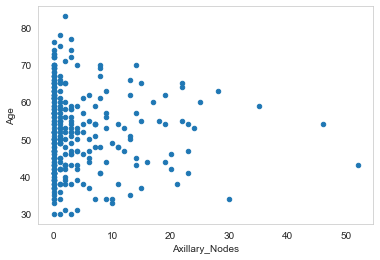

In [22]:
haberman.plot(kind='scatter', x='Axillary_Nodes', y='Age')
plt.grid()
plt.show()

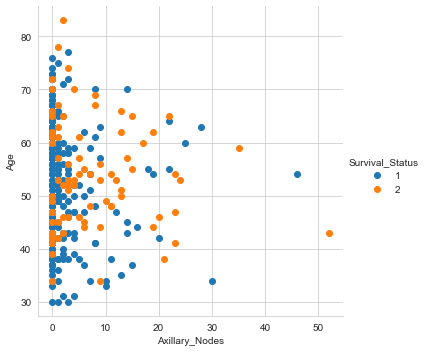

In [23]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue="Survival_Status", size=5).map(plt.scatter, 'Axillary_Nodes', 'Age').add_legend()
plt.show()

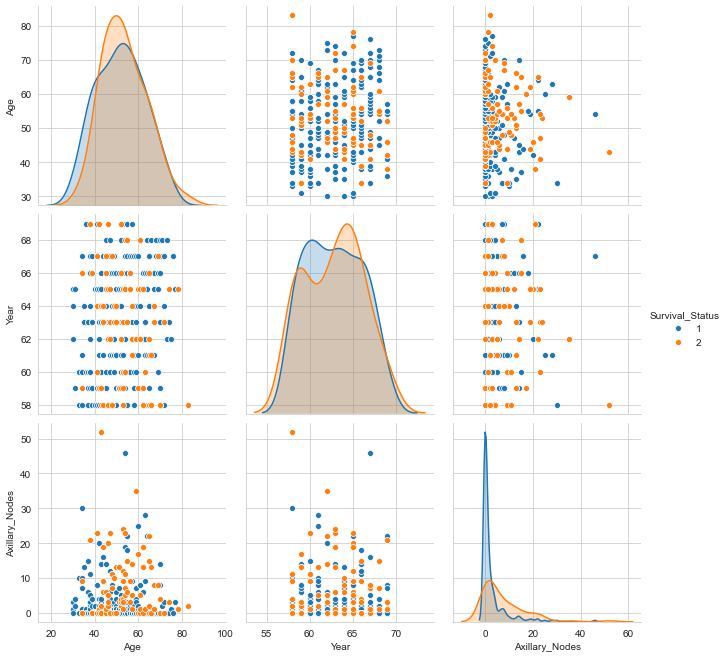

In [24]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman,hue="Survival_Status", size=3, vars=['Age','Year','Axillary_Nodes'])
plt.show()

#### 1-D scatter plot for age vs auxillary nodes.

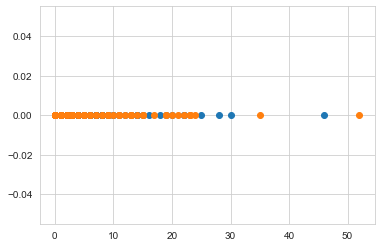

In [25]:
haberman_Long_Survive = haberman.loc[haberman["Survival_Status"] == 1]
haberman_Short_Survive = haberman.loc[haberman['Survival_Status'] == 2]
plt.plot(haberman_Long_Survive['Axillary_Nodes'], np.zeros_like(haberman_Long_Survive['Axillary_Nodes']), 'o')
plt.plot(haberman_Short_Survive['Axillary_Nodes'], np.zeros_like(haberman_Short_Survive['Axillary_Nodes']), 'o')
plt.show()

## PDF and CDF

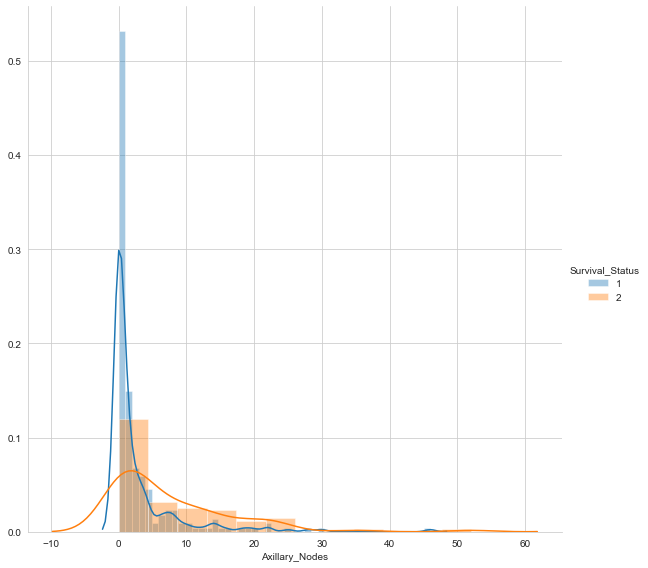

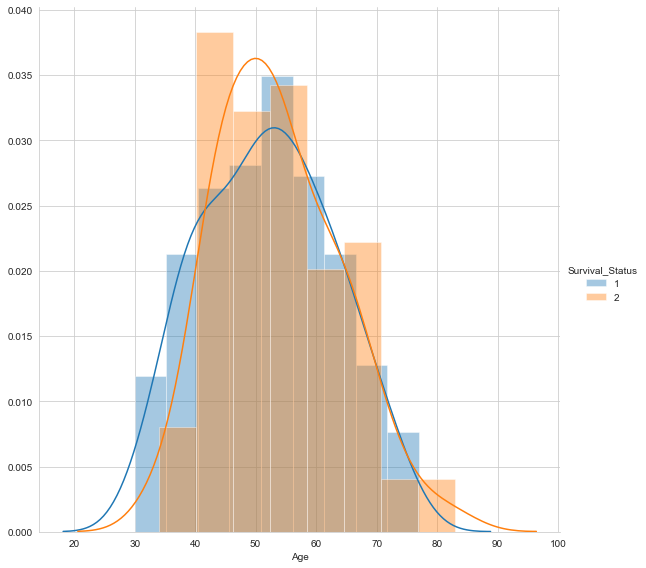

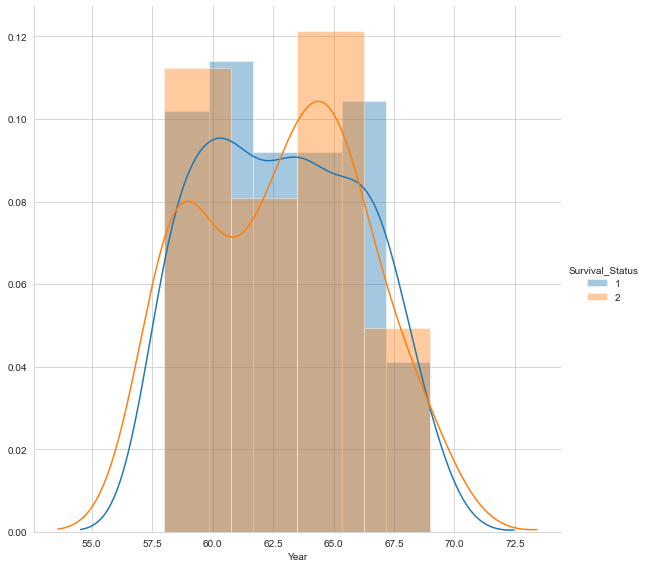

In [26]:
sns.FacetGrid(haberman,hue='Survival_Status', size=8).map(sns.distplot,'Axillary_Nodes').add_legend()
sns.FacetGrid(haberman,hue='Survival_Status', size=8).map(sns.distplot,'Age').add_legend()
sns.FacetGrid(haberman,hue='Survival_Status', size=8).map(sns.distplot,'Year').add_legend()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


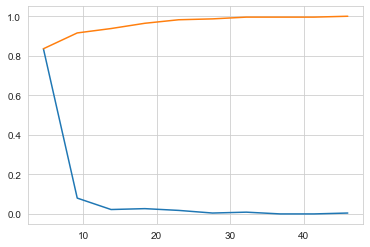

In [27]:
counts, bin_edges = np.histogram(haberman_Long_Survive['Axillary_Nodes'], bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


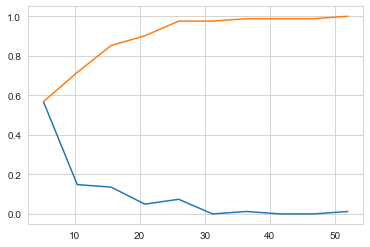

In [28]:
counts, bin_edges = np.histogram(haberman_Short_Survive['Axillary_Nodes'], bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

In [29]:
print("Means:")
print (np.mean(haberman_Long_Survive['Axillary_Nodes']))
print (np.mean(np.append(haberman_Long_Survive['Axillary_Nodes'],50)))
print (np.mean(haberman_Short_Survive['Axillary_Nodes']))
print("\nStandard Deviation:")
print(np.mean(haberman_Long_Survive['Axillary_Nodes']))
print(np.mean(haberman_Short_Survive['Axillary_Nodes']))

Means:
2.7911111111111113
3.0
7.45679012345679

Standard Deviation:
2.7911111111111113
7.45679012345679


In [30]:
print('Medians:')
print(np.median(haberman_Long_Survive['Axillary_Nodes']))
print(np.median(np.append(haberman_Long_Survive['Axillary_Nodes'],50)))
print(np.median(haberman_Short_Survive['Axillary_Nodes']))
print('\nQuantiles:')
print(np.percentile(haberman_Long_Survive['Axillary_Nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_Short_Survive['Axillary_Nodes'],np.arange(0,100,25)))
print('\n90th percentile:')
print(np.percentile(haberman_Long_Survive['Axillary_Nodes'],90))
print(np.percentile(haberman_Short_Survive['Axillary_Nodes'],90))
from statsmodels import robust
print ('\nMedian Absolute Deviation')
print(robust.mad(haberman_Long_Survive['Axillary_Nodes']))
print(robust.mad(haberman_Short_Survive['Axillary_Nodes']))

Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


## Box, Violin and Joint Plots

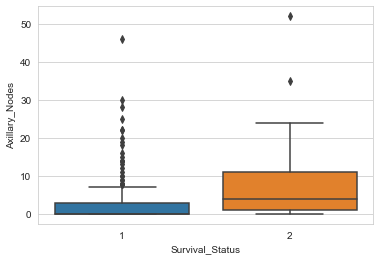

In [31]:
sns.boxplot(x='Survival_Status', y='Axillary_Nodes', data=haberman)
plt.show()

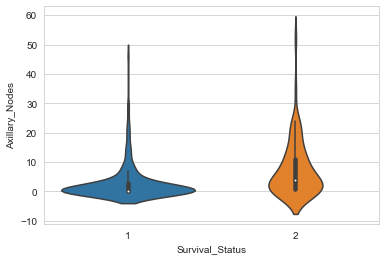

In [32]:
sns.violinplot(x='Survival_Status', y='Axillary_Nodes', data=haberman)
plt.show()

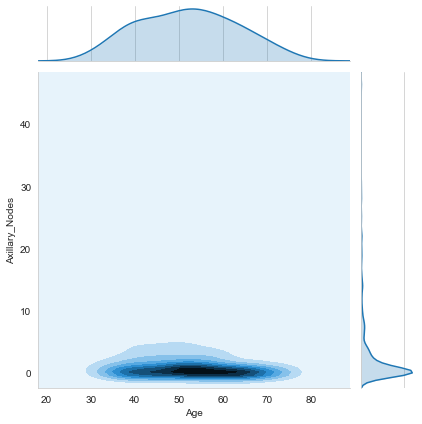

In [33]:
sns.jointplot(x='Age', y='Axillary_Nodes', data=haberman_Long_Survive, kind='kde')
plt.grid()
plt.show()